In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
# PassengerId: Passenger id
# Survived: 0 <==> No, 1 <==> Yes
# Pclass: 1 <==> 1st, 2 <==> 2nd, 3 <==> 3rd
# Name: Full passenger name
# Sex: Male or female
# Age: Age in years.Age is fractional if less than 1. If the age is estimated, is it in
# the form of xx.5
# SibSp: # of siblings or spouses aboard the Titanic
# Parch: # of parents or children aboard the Titanic. Some children travelled
# only with a nanny, therefore parch=0 for them.
# Ticket: Ticket number
# Fare: Passenger fare
# Cabin: Cabin number
# Embarked: Port of Embarkation, C <==> Cherbourg, Q <==> Queenstown, S
# <==> Southampton

In [3]:
# Read train dataset
train_csv = pd.read_csv("/home/shinde/Documents/personal_projects/Machine_failure/playground-series-s3e17/train.csv")
train_csv.head(10)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
5,5,M24300,M,298.4,308.9,1429,42.1,65,0,0,0,0,0,0
6,6,L56736,L,299.6,311.0,1413,42.9,156,0,0,0,0,0,0
7,7,L55488,L,298.7,310.1,1609,38.1,67,0,0,0,0,0,0
8,8,L56397,L,297.7,308.8,1578,35.2,13,0,0,0,0,0,0
9,9,L55067,L,300.5,312.3,1447,53.3,98,0,0,0,0,0,0


In [4]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [6]:
train_csv.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train_csv["Machine failure"].nunique()

2

<ipython-input-13-e265d7e4db2b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr(method = "spearman")


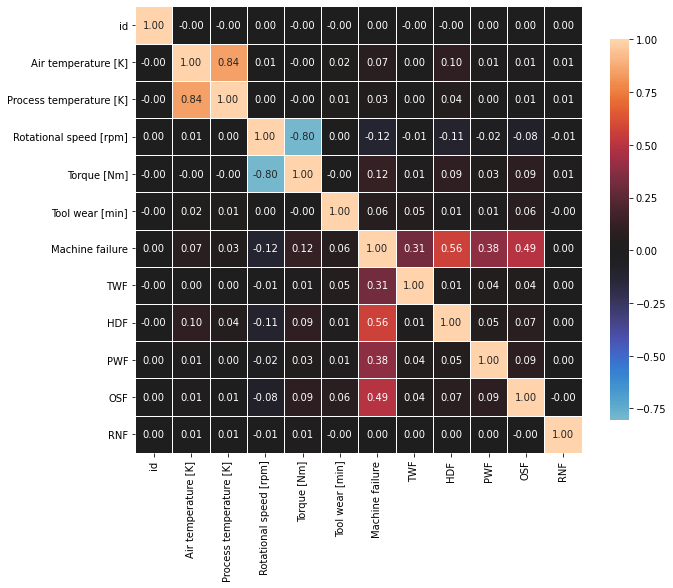

In [13]:
# Plot heatmap showing correlations between the features
def correlation_heatmap(df):
    correlations = df.corr(method = "spearman")
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
correlation_heatmap(train_csv)

<AxesSubplot:xlabel='Machine failure', ylabel='count'>

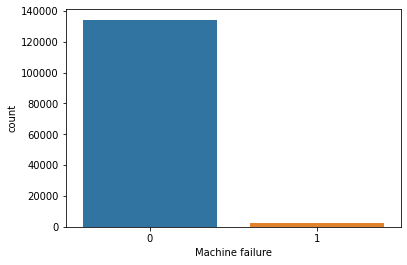

In [14]:
# Plotting the total survived and not survived
sns.countplot(x=train_csv["Machine failure"])

In [9]:
# Separate the input and target variables
X =  train_csv.loc[:, train_csv.columns != "Machine failure"]
X.head(10)

y = train_csv["Machine failure"] 

In [10]:
# train and validation Split
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size = 0.2, random_state = 67, stratify = y )

In [11]:
df = pd.concat([Xtrain, ytrain],axis = 1 )

In [12]:
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
73695,73695,L49550,L,299.2,308.4,1418,43.3,89,0,0,0,0,0,0
43627,43627,L56820,L,299.1,310.4,1563,34.0,119,0,0,0,0,0,0
110769,110769,L49056,L,298.3,308.0,1526,37.0,98,0,0,0,0,0,0
62342,62342,L52668,L,302.7,312.2,1450,52.1,213,0,0,0,0,0,1
99952,99952,M18618,M,302.2,311.0,1479,47.4,15,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119164,119164,M21673,M,300.9,310.7,1487,43.0,133,0,0,0,0,0,0
81896,81896,L56642,L,298.9,309.9,1554,44.7,116,0,0,0,0,0,0
72718,72718,L56319,L,297.5,308.5,1356,53.6,108,0,0,0,0,0,0
58070,58070,L56355,L,297.8,309.0,1513,42.7,30,0,0,0,0,0,0
